# Online Payments Fraud Detection system 
## Under Supervision of Dr.  Mushtaq Hussain
### Bc190204761 (Usman Ali)

# Introduction

In modern day’s Online Transaction plays an important role in every person’s daily activity. Customer purchases their needs with their online transitions. Banks and financial institutes consider denying the applications of customers to avoid the risk of defaulters.Risk is the rise of debt on the customer who fails to make the billing payment for some period. The purpose of the project is how to reduce the defaulters among the list of customers, and make a background check on whether to provide the loan or not and to find the promising customers. These predictive models would benefit the lending institutions and to the customers as it would make them more aware of their potential defaulting rate. The dataset is unbalanced so the focus was on the precision and recall more than the accuracy metrics. After comparison with 13 models and random forest  is the best model based on the False Negative value of confusion metrics.

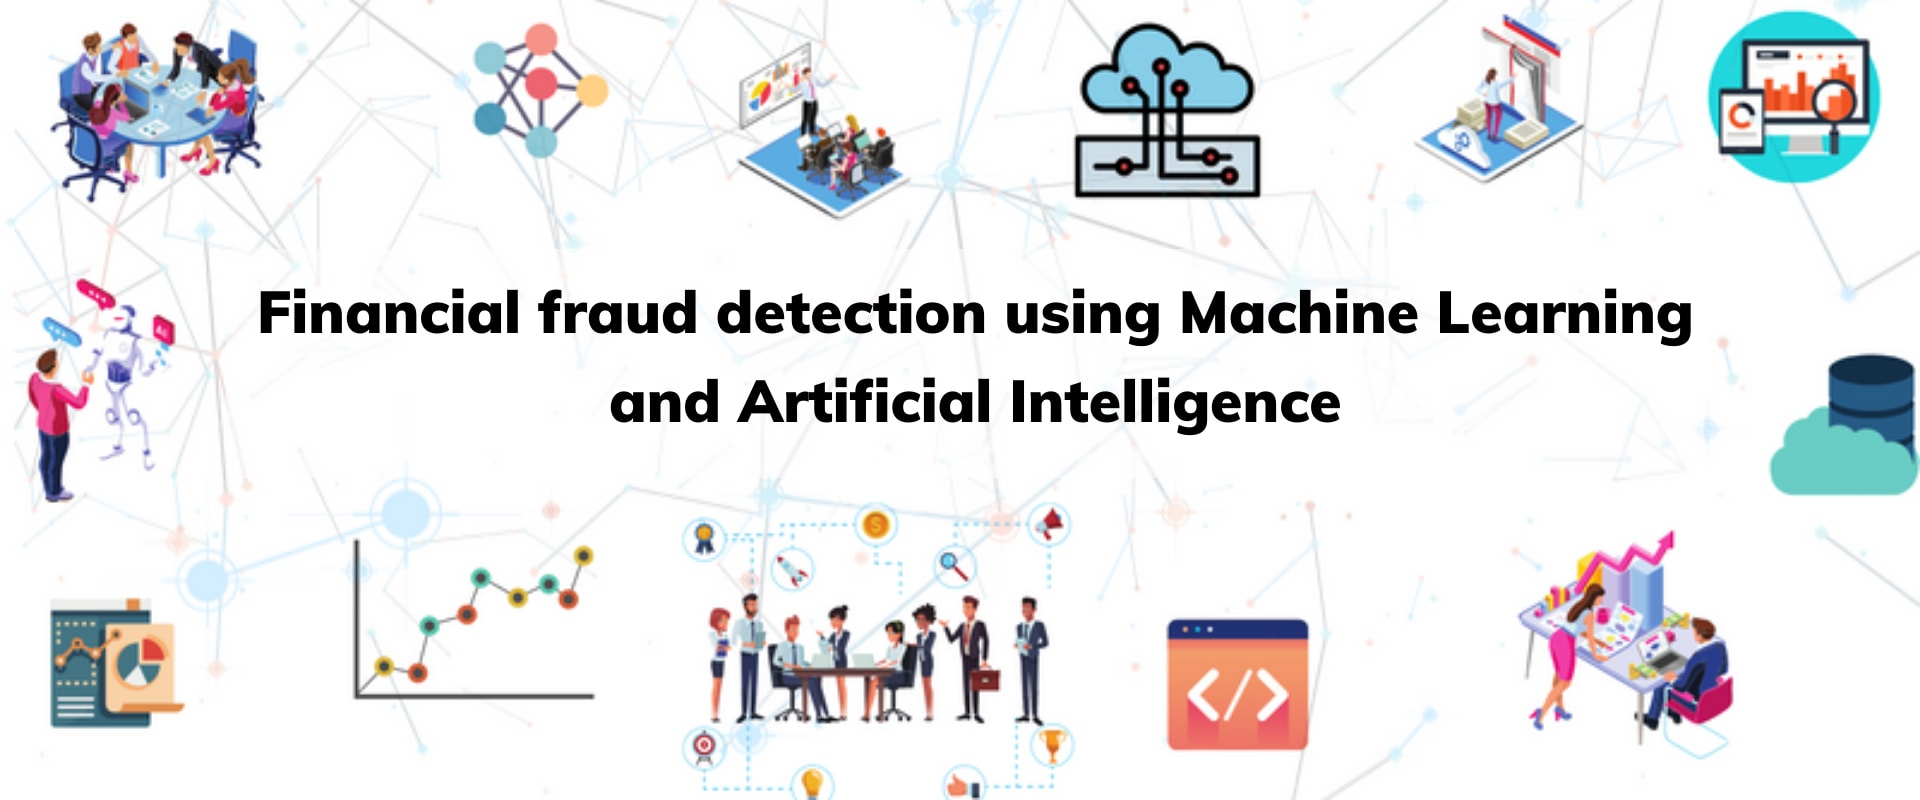

In [1]:
from IPython.display import Image
Image(filename='Financial-fraud-detection-using-Machine-Learning-and-Artificial-Intelligence.jpg')

In [ ]:

!pip install pycaret
from pycaret.utils import version
version()
# only run this cell if you are using google colab
from pycaret.utils import enable_colab
enable_colab()
# run this cell to install pycaret in Google Colab


# Aim and Objective
The problem is to classify the defaulters and non-defaulters on the credit payment of the customers. This project is helpful for solving the real problem by using various classification techniques. Moreover, any user can access GUI and add their gender, education, marital status and payment details to check next month in which category they fall (defaulter or non-defaulter). The core objectives: Find whether the customer could pay back his next credit amount or not and Identify some potential customers for the bank who can settle their credit balance. The steps followed to manage these goals:

* Selection of dataset
* Display some graphical information and visualize the features.
* Check Null values in the dataset
* Data pre-processing using one-hot encoding and remove extra parameters
* Train with classifiers
* Evaluate the model with test data
* Compare the accuracy, precision and recall finding the optimal model.
* Created a Graphical User Interface to check with real time customer data and predict defaulter for their next month payment

In [2]:
#import Libraries 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pycaret.classification import *

### Dataset
This dataset is presently only one of four on Kaggle with information on the rising risk of digital financial fraud, emphasizing the difficulty in obtaining such data. The main technical challenge it poses to predicting fraud is the highly imbalanced distribution between positive and negative classes in 6 million rows of data. Another stumbling block to the utility of this data stems from the possible discrepancies in its description [1], [2], [3]. The goal of this analysis is to solve both these issues by a detailed data exploration and cleaning followed by choosing a suitable machine-learning algorithm to deal with the skew. I show that an optimal solution based on feature-engineering and extreme gradient-boosted decision trees yields an enhanced predictive power of 0.997, as measured by the area under the precision-recall curve. Crucially, these results were obtained without artificial balancing of the data making this approach suitable to real-world applications

You can downlaod the dataset form [Click here](https://www.kaggle.com/datasets/ealaxi/paysim1?resource=download )

In [3]:
data = pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


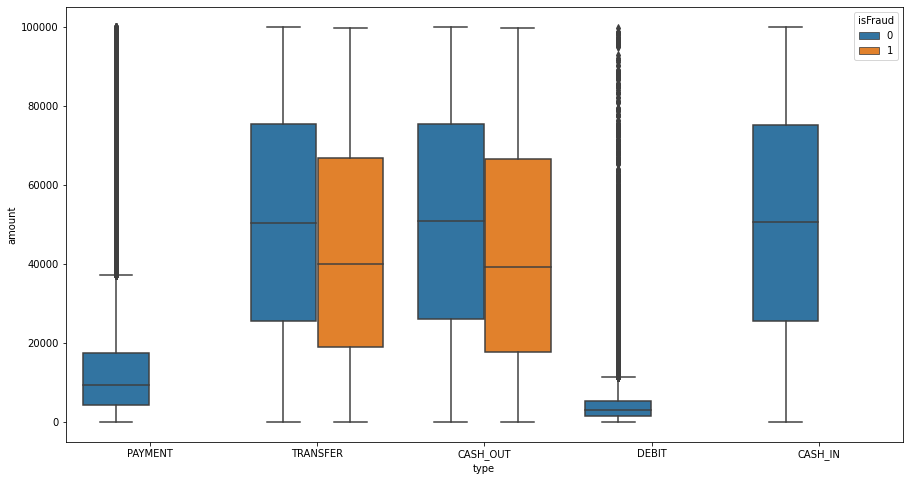

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(hue = 'isFraud', x = 'type', y = 'amount', data = data[data.amount < 1e5])

### Data Analysis

In [4]:
print("Number of records:\t\t",data.shape[0])
print("Number of features per record:\t",data.shape[1])

Number of records:		 6362620
Number of features per record:	 11


In [5]:
print("Any missing data?",data.isnull().sum().any())

Any missing data? False


In [6]:
print("No of Valid transactions:",data.isFraud.value_counts()[0],'which is ',round(data.isFraud.value_counts()[0]/data.shape[0] * 100,2),'%')
print("No of Fraud transactions:",data.isFraud.value_counts()[1],'which is ',round(data.isFraud.value_counts()[1]/data.shape[0] * 100,2),'%')

data.isFraud.value_counts()

No of Valid transactions: 6354407 which is  99.87 %
No of Fraud transactions: 8213 which is  0.13 %


0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
print("Any transaction with amount less than or equal to 0?")
print(len(data[data.amount<=0]))
print("What type of transactions are they?")
print(data[data.amount<=0]['type'].value_counts().index[0])
print("Are all these marked as Fraud Transactions?")
data[data.amount<=0]['isFraud'].value_counts()[1] == len(data[data.amount<=0])

Any transaction with amount less than or equal to 0?
16
What type of transactions are they?
CASH_OUT
Are all these marked as Fraud Transactions?


True

In [8]:
data_temp = data[data.isFlaggedFraud==1]
print("How many frauds transactions are Flagged?:")
print("\t",len(data_temp))

print("What type of transactions are they?")
print("\t",data_temp['type'].value_counts().index[0])

print("Are all these flagged also marked as Fraud Transactions?")
print("\t",data_temp['isFraud'].value_counts()[1] == len(data_temp))

print("Minumum amount transfered in these transactions")
print("\t",data_temp.amount.min())

print("Maximum amount transfered in these transactions")
print("\t",data_temp.amount.max())

How many frauds transactions are Flagged?:
	 16
What type of transactions are they?
	 TRANSFER
Are all these flagged also marked as Fraud Transactions?
	 True
Minumum amount transfered in these transactions
	 353874.22
Maximum amount transfered in these transactions
	 10000000.0


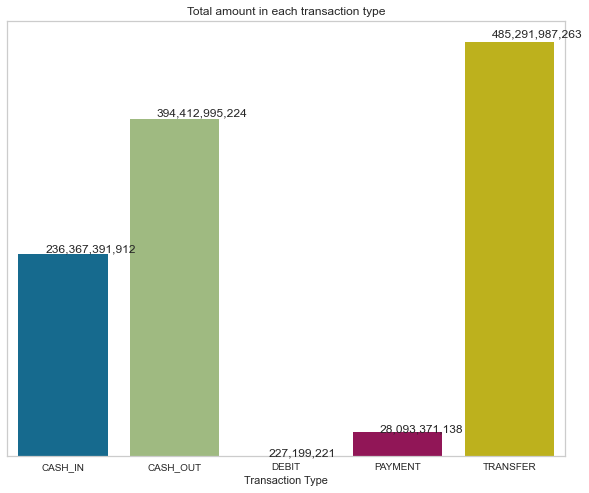

In [9]:
d = data.groupby('type')['amount'].sum()
plt.figure(figsize=(10,8))
ax = sns.barplot(x=d.index,y=d.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
    
plt.title("Total amount in each transaction type")
plt.yticks([])
plt.xlabel("Transaction Type")
plt.show()

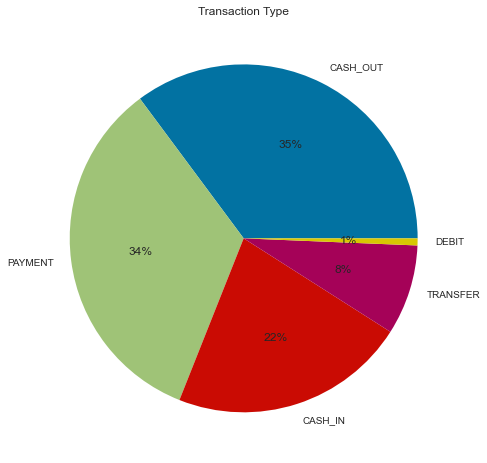

In [10]:
plt.figure(figsize=(10,8))
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

## Pre-processing
* The first step is data preprocessing. Data preprocessing used to convert the raw data into a clean data set.
* ID column dropped as its unnecessary for our modeling.
* Numeric attributes converted to nominal.
* One hot encoding which is a process by which categorical variables converted into a dummy form that provided to algorithms to do a better job in prediction. One hot encoder used to perform linearization of data. 
* For change of categorical data into numeric form we use factorize function form pandas
    * 1  for CASH_OUT	    
    * 2  for CASH_IN
    * 3  for PAYMENT
    * 4  for TRANSFER	
    * 0  for DEBIT

In [11]:
data.drop(['step','nameOrig','nameDest','isFlaggedFraud','oldbalanceDest','newbalanceDest'],axis=1,inplace=True)
data['type'] = pd.factorize(data['type'], sort=True)[0]

data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,3,9839.64,170136.0,160296.36,0
1,3,1864.28,21249.0,19384.72,0
2,4,181.00,181.0,0.00,1
3,1,181.00,181.0,0.00,1
4,3,11668.14,41554.0,29885.86,0


<Figure size 864x576 with 0 Axes>

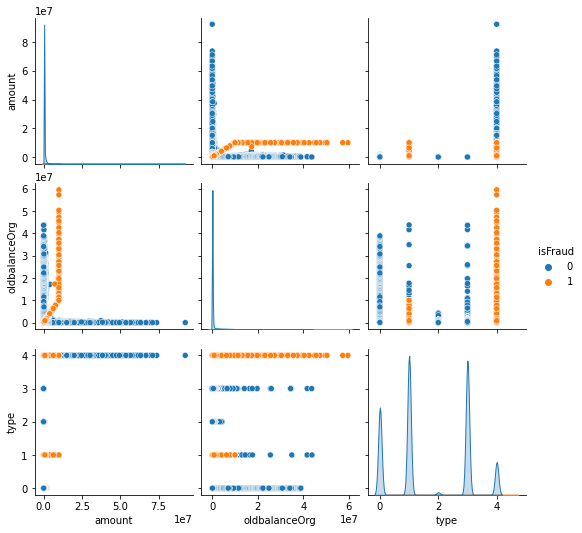

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(data[['amount', 'oldbalanceOrg', 'type', 'isFraud']], hue='isFraud')

In [12]:
data.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.290820e-03
std,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,0.000000e+00
75%,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,0.000000e+00
max,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,1.000000e+00


In [13]:
data.median()


type                  1.00
amount            74871.94
oldbalanceOrg     14208.00
newbalanceOrig        0.00
isFraud               0.00
dtype: float64

In [14]:
data.mode()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,1,10000000.0,0.0,0.0,0


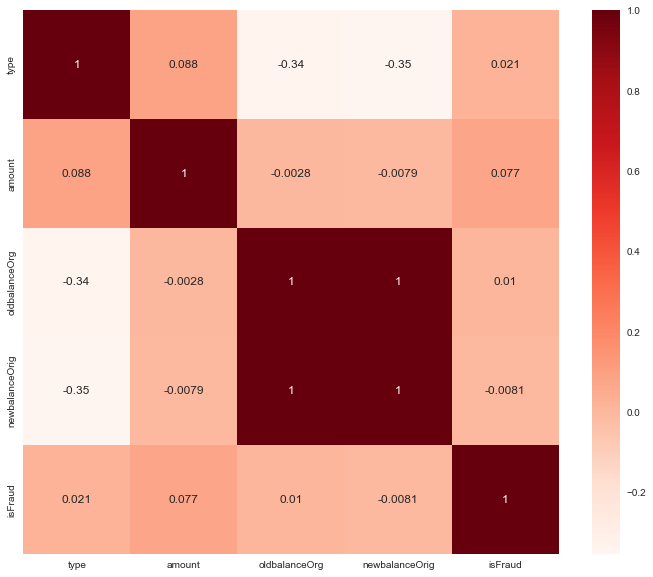

In [15]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

* For Normalization with z score we use built in funcition from pycaret 
* For Feature Seleciton  we use built in funcition from pycaret 
* In pycaret the be defalut training size is * 0.7 * left dataset is for testing 

In [16]:

from pycaret.classification import *
clf = setup(data, target = "isFraud", session_id=1498, normalize = True, feature_selection = True)

,Description,Value
0,session_id,1498
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6362620, 5)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


### Model Selection
Now here we check the best fit algorithem for this data set

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9746,0.6941,0.8548,0.7661,0.7658,0.7700,299.175
et,Extra Trees Classifier,0.9995,0.9764,0.7061,0.8591,0.7751,0.7749,0.7786,120.520
dt,Decision Tree Classifier,0.9992,0.8613,0.7230,0.7023,0.7125,0.7121,0.7122,18.730
lr,Logistic Regression,0.9988,0.9503,0.1142,0.8354,0.2009,0.2007,0.3085,24.795
gbc,Gradient Boosting Classifier,0.9988,0.5901,0.0597,0.6289,0.1036,0.1035,0.1639,316.775
svm,SVM - Linear Kernel,0.9987,0.0000,0.0003,0.5000,0.0007,0.0007,0.0132,10.950
ridge,Ridge Classifier,0.9987,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.995
ada,Ada Boost Classifier,0.9987,0.9788,0.1369,0.5402,0.2183,0.2179,0.2714,104.495
dummy,Dummy Classifier,0.9987,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,8.990
lightgbm,Light Gradient Boosting Machine,0.9982,0.5009,0.0629,0.0961,0.0741,0.0733,0.0758,37.725


In [ ]:
best


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1498, verbose=0,
                       warm_start=False)

### Model Training

In [ ]:
lr = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9867,0.7583,0.8617,0.8067,0.8064,0.8081
1,0.9996,0.9849,0.7791,0.8665,0.8205,0.8203,0.8215
2,0.9996,0.9919,0.8139,0.9017,0.8556,0.8554,0.8565
3,0.9995,0.9806,0.7422,0.8747,0.8030,0.8028,0.8055
4,0.9995,0.9823,0.7422,0.8589,0.7963,0.7960,0.7981
5,0.9995,0.9937,0.7700,0.8633,0.8140,0.8138,0.8151
6,0.9995,0.9849,0.7195,0.8377,0.7741,0.7739,0.7761
7,0.9995,0.9814,0.7439,0.8489,0.7929,0.7927,0.7944
8,0.9996,0.9771,0.7561,0.8930,0.8189,0.8187,0.8215


### Performance Metric  

In [ ]:
predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9996,0.9868,0.7745,0.8688,0.8189,0.8187,0.8201


,amount,oldbalanceOrg,type_0,type_1,type_2,type_3,type_4,isFraud,Label,Score
0,-0.173944,-0.286851,1.0,0.0,0.0,0.0,0.0,0,0,1.0
1,0.199877,-0.285162,1.0,0.0,0.0,0.0,0.0,0,0,1.0
2,-0.286376,-0.274037,0.0,0.0,0.0,1.0,0.0,0,0,1.0
3,-0.124034,-0.288700,0.0,1.0,0.0,0.0,0.0,0,0,1.0
4,0.099615,-0.171555,1.0,0.0,0.0,0.0,0.0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
1908782,0.261691,-0.288700,0.0,1.0,0.0,0.0,0.0,0,0,1.0
1908783,-0.125237,-0.279548,0.0,1.0,0.0,0.0,0.0,0,0,1.0
1908784,0.185083,4.249578,1.0,0.0,0.0,0.0,0.0,0,0,1.0
1908785,-0.272731,-0.191140,0.0,0.0,0.0,1.0,0.0,0,0,1.0


### Confusion Matrix
To check the performance of ML models, confusion matrix table is create using python library

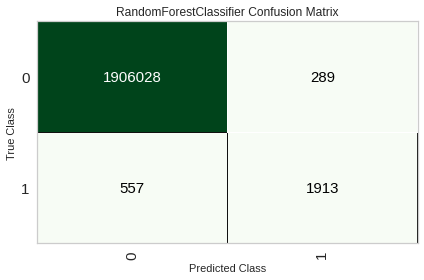

In [ ]:
plot_model(lr, plot = 'confusion_matrix')

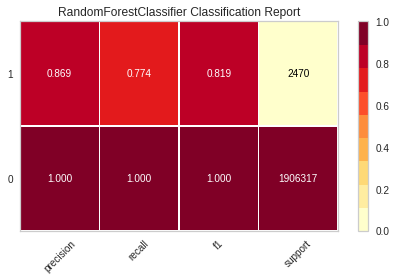

In [ ]:
plot_model(lr, plot = 'class_report')

### Saving Model

In [ ]:
save_model(lr, 'rfmodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='isFraud',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

# Pretrained Model 
### you can download the pretrained model from here [Click here](https://drive.google.com/file/d/10IOpVC2iYHh-PY5E9hgAYSrsUHzvtjlm/view?usp=sharing)

# Development
## app.py

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from pycaret.regression import load_model , predict_model
saved_lr = load_model('rfmodel') 

def predict(model , input_df):
    prediction_df= predict_model(estimator=saved_lr , data = input_df)
    prediction = prediction_df['Label'][0]
    return prediction


def run():
    st.sidebar.image("Untitled.png",caption='Virtual University Of Pakistan')
    st.title("Online Payments Fraud Detection system")
    st.sidebar.subheader('Under the Supervision of Dr.  Mushtaq Hussain ')
    get= st.selectbox("Type",['CASH_OUT','CASH_IN','PAYMENT', 'TRANSFER','DEBIT'])
    if get == 'CASH_OUT':
        Type = 1
    if get == 'CASH_IN':
        Type = 2
    if get == 'PAYMENT':
        Type = 3
    if get == 'TRANSFER':
        Type = 4
    if get == 'DEBIT':
        Type = 5
    amount = st.number_input("Amount" )
    oldbalanceOrg= st.number_input("Initial balance before the transaction" , value= 1)
    newbalanceOrig= st.number_input("Customer's balance after the transaction" , value= 1)
    output = ""
    input_dict = {'type': Type , 'amount': amount , 'oldbalanceOrg':oldbalanceOrg,'newbalanceOrig':newbalanceOrig}
    input_df=pd.DataFrame([input_dict])
    st.sidebar.bar_chart(input_df)
    
    if st.button('Predict'):
        output=predict(model=saved_lr , input_df= input_df)
        if output == 1:
            output='You do a Fraud Transaction'
        if output == 0:
            output = 'Your Transaction is Not Fraud'
            
        
        
    st.success(output)

run()


you can download all files form this drive link [drive](https://drive.google.com/drive/folders/1jFx8aL3PoNqFBI9l4wiKERhazsQbvwQe?usp=sharing)